# University of Aberdeen

## Applied AI (CS5079)

### Tutorial (Day 1) - Data Processing & Visualisations

---

 This lecture is inspired by Chapter 3 of __Practical Machine Learning with Python__ (2018), Sarkar et al., and the slides covered in our lectures.


## Learning Outcomes

On successful completion of this component a student will have demonstrated competence in using Pandas data structures (especially dataframes), Requests and BeautifulSoup for Data Scraping and different techniques for Exploratory Data Analysis.

### In this tutorial, we will use the following libraries and modules

In [2]:
#Essential libraries for data represetation
import pandas as pd

#Libraries for data scraping
import requests
from bs4 import BeautifulSoup

## Task 1: Data Scraping with Requests and BeautifulSoup

The Internet contains a a large amount of data in the form of web pages which are constantly generated, updated, and consumed. With information residing in these web pages, it is imperative that we must learn how to interact and extract this information/data as well. 

In this practical, we will help you collect data from websites using the Requests and BeautifulSoup libraries. Requests allows you to send HTTP requests extremely easily whereas BeautifulSoup is used for pulling data out of HTML and XML files.The documentation for the two libraries is available online:

- BeautifulSoup: https://www.crummy.com/software/BeautifulSoup/bs4/doc/
- Requests: https://requests.readthedocs.io/en/master/

1.1. If you are not using Codio, instal the Requests and BeautifulSoup libraries with pip, create a Python notebook and import the aforementioned libraries. Use the function `get` of requests to query the following book website: http://books.toscrape.com. A successful response should return a `status_code` with a value of 200. The content of the response will be a string containing the html source the target book website.

In [3]:
base_url="http://books.toscrape.com"

requests.get(base_url)

<Response [200]>

1.2. For each book on the website, we want to first start by extracting the following informations: 

- The number of stars (1 to 5)
- The price
- The title of the book
- The url of the book on this website. 
  
Open the book website with the browser of your choice and inspect the source to locate where each information is located.



1.3. Write a function get_books_mapping that takes as input the content of the webpage response (returned by `requests.get`) and returns a completed dictionary with the following keys: `star, price, title` and `url`. 

__Example:__ 

The command `get_books_mapping(response.content)`, where reponse is the response obtained by requests on http://books.toscrape.com/catalogue/page-1.html, should return the following output:

```
{'star': [3, 1, 1,...],
 'title': ['A Light in the Attic',
  'Tipping the Velvet',
  'Soumission',...],
 'price': [51.77,
  53.74,
  50.10,...],
 'url': ['http://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html',
  'http://books.toscrape.com/catalogue/tipping-the-velvet_999/index.html',
  'http://books.toscrape.com/catalogue/soumission_998/index.html',...]}
```

__Tips:__

- `BeautifulSoup(content,"html.parser")` will create a BeautifulSoup object from the string content of your request response (in HTML format).
- `soup.find_all("h3")` will scan the BeautifulSoup object soup for `<h3>` tags.
- `soup.find(class_="shoes")` will search for the first occurence of a tag with shoes as its class in the BeautifulSoup object soup.
- `soup["class"]` will return the list of the classes of the BeautifulSoup object soup.
- `soup.contents` will return the contents of the BeautifulSoup object soup.

In [3]:
def get_books_mapping(content):
  books_dic = { "star" : [], "title" : [], "price" : [], "url" : []}
  soup = BeautifulSoup(content,'html.parser') 
  
  #-- BEGN SOLUTION --
  products = soup.find_all(class_="product_pod")
  for p in products:
      books_dic["url"].append(base_url+"/catalogue/"+(p.find("a")["href"]))
      books_dic["price"].append(float(p.find(class_="price_color").contents[0][1:]))
      books_dic["title"].append(p.find("img")["alt"])
      star_string = p.find(class_="star-rating")["class"][1]
      books_dic["star"].append(1 if star_string == 'One' 
                               else 2 if star_string == "Two" 
                               else 3 if star_string == "Three" 
                               else 4 if star_string == "Four" 
                               else 5)
  #-- END SOLUTION --

  return books_dic


get_books_mapping(requests.get("http://books.toscrape.com/catalogue/page-1.html").content)

{'price': [51.77,
  53.74,
  50.1,
  47.82,
  54.23,
  22.65,
  33.34,
  17.93,
  22.6,
  52.15,
  13.99,
  20.66,
  17.46,
  52.29,
  35.02,
  57.25,
  23.88,
  37.59,
  51.33,
  45.17],
 'star': [3, 1, 1, 4, 5, 1, 4, 3, 4, 1, 2, 4, 5, 5, 5, 3, 1, 1, 2, 2],
 'title': ['A Light in the Attic',
  'Tipping the Velvet',
  'Soumission',
  'Sharp Objects',
  'Sapiens: A Brief History of Humankind',
  'The Requiem Red',
  'The Dirty Little Secrets of Getting Your Dream Job',
  'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
  'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
  'The Black Maria',
  'Starving Hearts (Triangular Trade Trilogy, #1)',
  "Shakespeare's Sonnets",
  'Set Me Free',
  "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)",
  'Rip it Up and Start Again',
  'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991',
  'Olio',
  'Mesaerion: The Best Scie

1.4. Use the previous `get_books_mapping()` function to populate the `all_books` Pandas dataframe with all the data collected. You should obtain 1000 book entries with indexes between 0 and 999.

In [4]:
all_books = pd.DataFrame.from_dict(get_books_mapping(requests.get("http://books.toscrape.com/catalogue/page-1.html").content)) 
for i in range(2,51):
  temp = pd.DataFrame.from_dict(get_books_mapping(requests.get("http://books.toscrape.com/catalogue/page-"+str(i)+".html").content))
  all_books = all_books.append(temp)
all_books = all_books.reset_index(drop=True)

1.5. Add and fill a column `genre` (Historial Fiction, etc.) to the `all_books` Pandas dataframe. One way to achieve this is to implement a function `get_genre()` that fetches the genre from the corresponding book url and to use the Pandas `map()` function to apply it to each url.

In [5]:
def get_genre(url):
  soup = BeautifulSoup(requests.get(url).content,'html.parser') 
  return soup.find(class_="breadcrumb").contents[5].find("a").contents[0]

all_books["genre"] = all_books["url"].map(get_genre)



## Exploratory Data Analysis of the Scrapped Data

2.1. Print the list of the book genres. How many book genres are there? What can you say?

In [6]:
all_books["genre"].unique()

array(['Poetry', 'Historical Fiction', 'Fiction', 'Mystery', 'History',
       'Young Adult', 'Business', 'Default', 'Sequential Art', 'Music',
       'Science Fiction', 'Politics', 'Travel', 'Thriller',
       'Food and Drink', 'Romance', 'Childrens', 'Nonfiction', 'Art',
       'Spirituality', 'Philosophy', 'New Adult', 'Contemporary',
       'Fantasy', 'Add a comment', 'Science', 'Health', 'Horror',
       'Self Help', 'Religion', 'Christian', 'Crime', 'Autobiography',
       'Christian Fiction', 'Biography', 'Womens Fiction', 'Erotica',
       'Cultural', 'Psychology', 'Humor', 'Historical', 'Novels',
       'Short Stories', 'Suspense', 'Classics', 'Academic',
       'Sports and Games', 'Adult Fiction', 'Parenting', 'Paranormal'],
      dtype=object)

2.2. Replace the books with the genre “Add a comment” and “Default” in the all_books dataframe with the genre “Unknown”.

In [7]:
all_books["genre"] = all_books["genre"].replace({"Default": "Unknown", "Add a comment": "Unknown"})

2.3. Compute the median price of a book per genre (using groupby) and sort the genres from the cheapest to the most expensive (using sort_values). Use a bar plot to show the median price for each genre where the x-axis will be the genre names and the y-label will be the price.

In [8]:
sorted_genre_price = all_books[['price', 'genre']].groupby(['genre']).median().sort_values(by=['price'])
sorted_genre_price

,price
genre,
Crime,10.970
Academic,13.120
Adult Fiction,15.360
Paranormal,15.400
Erotica,19.190
Historical,22.830
Mystery,25.385
Religion,28.420
Childrens,28.540


In [9]:
sorted_genre_price.plot(kind="bar", title="Median price per genre", figsize=(15,4))


2.4. Create a bar plot to show the number of books per genre and a scatter plot where the x-axis is the price, the y-axis is the genre and the size of the points are defined by the number of stars. What can you conclude?

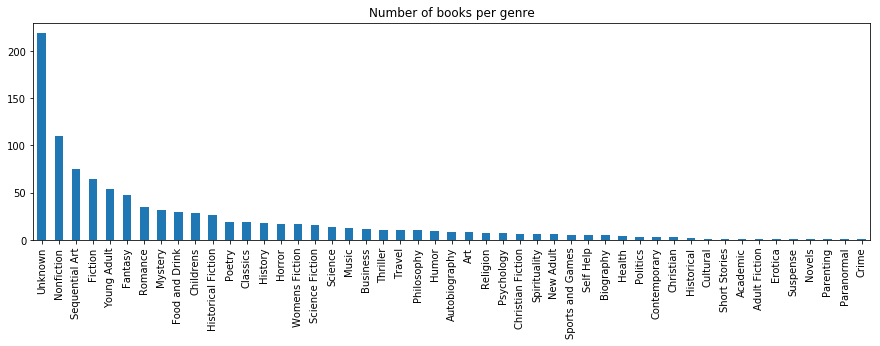

In [10]:
count_genre = all_books["genre"].value_counts()

count_genre.plot(kind='bar', title="Number of books per genre", figsize=(15,4))


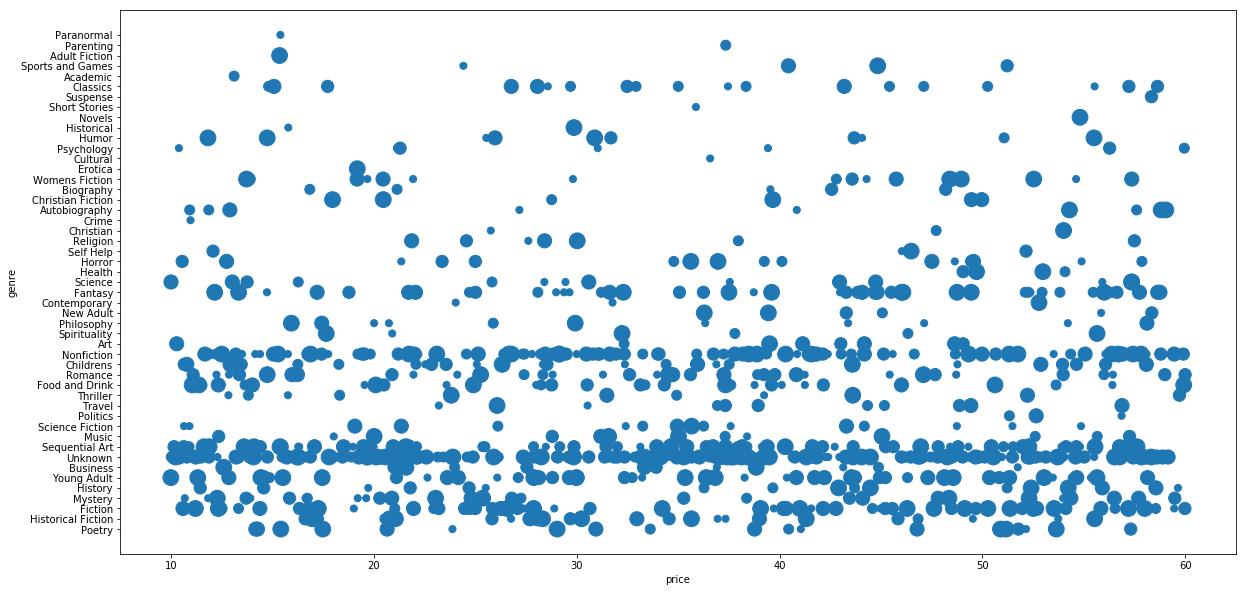

In [11]:
all_books.plot.scatter(x="price", y="genre", s=all_books["star"]*50, figsize=(20,10))